# WeatherPy

In [124]:
# Dependencies, Libraries & more
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy # Why?
from scipy.stats import linregress

In [95]:
# Create city list
cities = []
# Create coordinates list
coordinates = []
# Generate 800 random latitudes and 800 random longitudes
# Longitud +/- 180 from the Equator
lon = np.random.uniform(low=-180.0000, high=180.0000, size=1400)
# Latitud +/- 90 from Greenwich Meridian
lat = np.random.uniform(low=-90.0000, high=90.0000, size=1400)
# Join the two random lists
coordinates = zip(lat, lon)
# Find nearest city for longitude latitude combos and if it is first timer include in the list
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    if city not in cities:
        cities.append(city.title())

# API Calls for Temperature, Humidity, Cloudiness & Windspeed

In [112]:
# Import API key
from llaves import api_key

# Output File (CSV)
output_data = "weather_df.csv"

# Weather config
weathurl = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# # define url

# Build partial query URL
q_url_1 = f"{weathurl}appid={api_key}&units={units}&q="
# query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Lists
city_selection = []
countries = []
hi_temps = []
humidities = []
clouds = []
winds_sp = []
dates = []
lats = []
lons = []
i = 1

# Create a loop to feed the city list
for city in cities:
    q_url_2 = q_url_1 + city
    response = requests.get(q_url_2).json()
    
    try:
        country = response['sys']['country']
        hi_temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        cloud = response['clouds']['all']
        wind_sp = response['wind']['speed']
        date = response['dt']
        lat = response['coord']['lat']
        lon = response['coord']['lon']

    except:
        country = np.nan
        hi_temp = np.nan
        humidity = np.nan
        cloud = np.nan
        wind_sp = np.nan
        date = np.nan
        lat = np.nan
        lon = np.nan

    countries.append(country)
    dates.append(date)
    lats.append(lat)                                          
    lons.append(lon)
    hi_temps.append(hi_temp)
    humidities.append(humidity)
    clouds.append(cloud)
    winds_sp.append(wind_sp)
        
    # Print the data being processed
    print (f"{i}: {city} --> Country: {country} Coordinates: {lat},{lon} Max Temp: {hi_temp}, Humidity: {humidity}, Cloudiness: {cloud}, Wind Speed: {wind_sp}")
    i+=1

1: Sisophon --> Country: KH Coordinates: 13.5859,102.9737 Max Temp: 26.92, Humidity: 78, Cloudiness: 91, Wind Speed: 2.67
2: San Cristobal --> Country: VE Coordinates: 7.7669,-72.225 Max Temp: 24, Humidity: 100, Cloudiness: 75, Wind Speed: 1.54
3: Cam Ranh --> Country: VN Coordinates: 11.9214,109.1591 Max Temp: 29, Humidity: 65, Cloudiness: 20, Wind Speed: 2.06
4: Taolanaro --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
5: Yellowknife --> Country: CA Coordinates: 62.456,-114.3525 Max Temp: -1.11, Humidity: 59, Cloudiness: 75, Wind Speed: 6.17
6: Lebu --> Country: CL Coordinates: -37.6167,-73.65 Max Temp: 12.83, Humidity: 94, Cloudiness: 100, Wind Speed: 3.42
7: San Juan --> Country: AR Coordinates: -31.5375,-68.5364 Max Temp: 20.39, Humidity: 38, Cloudiness: 0, Wind Speed: 1.11
8: Rikitea --> Country: PF Coordinates: -23.1203,-134.9692 Max Temp: 24.79, Humidity: 66, Cloudiness: 77, Wind Speed: 5.37
9: Port Alfred --> Country: ZA Coo

69: Khatanga --> Country: RU Coordinates: 71.9667,102.5 Max Temp: 0.11, Humidity: 93, Cloudiness: 100, Wind Speed: 3.11
70: Alveringem --> Country: BE Coordinates: 50.9793,2.6775 Max Temp: 4.44, Humidity: 93, Cloudiness: 69, Wind Speed: 0.51
71: Punta Arenas --> Country: CL Coordinates: -53.15,-70.9167 Max Temp: 5, Humidity: 93, Cloudiness: 90, Wind Speed: 3.6
72: Albany --> Country: US Coordinates: 42.6001,-73.9662 Max Temp: 12.78, Humidity: 90, Cloudiness: 100, Wind Speed: 0.45
73: Hobart --> Country: AU Coordinates: -42.8794,147.3294 Max Temp: 18.33, Humidity: 77, Cloudiness: 20, Wind Speed: 4.12
74: Arraial Do Cabo --> Country: BR Coordinates: -22.9661,-42.0278 Max Temp: 22.14, Humidity: 72, Cloudiness: 9, Wind Speed: 4.19
75: Lebu --> Country: CL Coordinates: -37.6167,-73.65 Max Temp: 12.83, Humidity: 94, Cloudiness: 100, Wind Speed: 3.42
76: Toliary --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
77: Barrow --> Country: US Coor

137: New Norfolk --> Country: AU Coordinates: -42.7826,147.0587 Max Temp: 18.33, Humidity: 64, Cloudiness: 8, Wind Speed: 2.24
138: Jamestown --> Country: US Coordinates: 42.097,-79.2353 Max Temp: 8.89, Humidity: 93, Cloudiness: 90, Wind Speed: 4.63
139: Port Alfred --> Country: ZA Coordinates: -33.5906,26.891 Max Temp: 17.32, Humidity: 72, Cloudiness: 100, Wind Speed: 6.34
140: Yellowknife --> Country: CA Coordinates: 62.456,-114.3525 Max Temp: -1.11, Humidity: 59, Cloudiness: 75, Wind Speed: 6.17
141: Lebu --> Country: CL Coordinates: -37.6167,-73.65 Max Temp: 12.83, Humidity: 94, Cloudiness: 100, Wind Speed: 3.42
142: Hilo --> Country: US Coordinates: 19.7297,-155.09 Max Temp: 28, Humidity: 57, Cloudiness: 1, Wind Speed: 3.6
143: Punta Arenas --> Country: CL Coordinates: -53.15,-70.9167 Max Temp: 5, Humidity: 93, Cloudiness: 90, Wind Speed: 3.6
144: Beloha --> Country: MG Coordinates: -25.1667,45.05 Max Temp: 22.02, Humidity: 69, Cloudiness: 0, Wind Speed: 2.74
145: Klaksvik --> Cou

204: Upernavik --> Country: GL Coordinates: 72.7868,-56.1549 Max Temp: -3.4, Humidity: 65, Cloudiness: 100, Wind Speed: 2.06
205: Gladstone --> Country: AU Coordinates: -23.85,151.25 Max Temp: 23, Humidity: 60, Cloudiness: 40, Wind Speed: 6.17
206: Illoqqortoormiut --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
207: Seoul --> Country: KR Coordinates: 37.5683,126.9778 Max Temp: 12, Humidity: 71, Cloudiness: 75, Wind Speed: 1.54
208: Provideniya --> Country: RU Coordinates: 64.3833,-173.3 Max Temp: 1, Humidity: 69, Cloudiness: 40, Wind Speed: 1
209: Arraial Do Cabo --> Country: BR Coordinates: -22.9661,-42.0278 Max Temp: 22.14, Humidity: 72, Cloudiness: 9, Wind Speed: 4.19
210: New Norfolk --> Country: AU Coordinates: -42.7826,147.0587 Max Temp: 18.33, Humidity: 64, Cloudiness: 8, Wind Speed: 2.24
211: Pakokku --> Country: MM Coordinates: 21.3333,95.1 Max Temp: 30.58, Humidity: 51, Cloudiness: 4, Wind Speed: 2.88
212: Attawapiskat -->

272: Abonnema --> Country: NG Coordinates: 4.7084,6.7931 Max Temp: 26, Humidity: 94, Cloudiness: 40, Wind Speed: 2.27
273: Severo-Kurilsk --> Country: RU Coordinates: 50.6789,156.125 Max Temp: 3.59, Humidity: 81, Cloudiness: 19, Wind Speed: 2.45
274: Rikitea --> Country: PF Coordinates: -23.1203,-134.9692 Max Temp: 24.79, Humidity: 66, Cloudiness: 77, Wind Speed: 5.37
275: Illoqqortoormiut --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
276: Vaini --> Country: TO Coordinates: -21.2,-175.2 Max Temp: 24, Humidity: 100, Cloudiness: 75, Wind Speed: 5.14
277: Talnakh --> Country: RU Coordinates: 69.4865,88.3972 Max Temp: -1.17, Humidity: 92, Cloudiness: 90, Wind Speed: 1.68
278: Atuona --> Country: PF Coordinates: -9.8,-139.0333 Max Temp: 26.41, Humidity: 68, Cloudiness: 5, Wind Speed: 1.97
279: Thompson --> Country: CA Coordinates: 55.7435,-97.8558 Max Temp: 1, Humidity: 40, Cloudiness: 20, Wind Speed: 7.2
280: Kabare --> Country: CD Coo

341: Vaini --> Country: TO Coordinates: -21.2,-175.2 Max Temp: 24, Humidity: 100, Cloudiness: 75, Wind Speed: 5.14
342: Rikitea --> Country: PF Coordinates: -23.1203,-134.9692 Max Temp: 24.79, Humidity: 66, Cloudiness: 77, Wind Speed: 5.37
343: Kaitangata --> Country: NZ Coordinates: -46.2817,169.8464 Max Temp: 13.33, Humidity: 55, Cloudiness: 85, Wind Speed: 8.49
344: Stokmarknes --> Country: NO Coordinates: 68.5646,14.9108 Max Temp: 1.11, Humidity: 77, Cloudiness: 57, Wind Speed: 4.57
345: Vostok --> Country: RU Coordinates: 46.4856,135.8833 Max Temp: 11.83, Humidity: 28, Cloudiness: 64, Wind Speed: 2.63
346: Albany --> Country: US Coordinates: 42.6001,-73.9662 Max Temp: 12.78, Humidity: 90, Cloudiness: 100, Wind Speed: 0.45
347: Vaini --> Country: TO Coordinates: -21.2,-175.2 Max Temp: 24, Humidity: 100, Cloudiness: 75, Wind Speed: 5.14
348: Havelock --> Country: US Coordinates: 34.8791,-76.9013 Max Temp: 22.22, Humidity: 73, Cloudiness: 1, Wind Speed: 7.2
349: Salalah --> Country: 

409: Ushuaia --> Country: AR Coordinates: -54.8,-68.3 Max Temp: 5, Humidity: 65, Cloudiness: 40, Wind Speed: 2.06
410: Melo --> Country: UY Coordinates: -32.3667,-54.1833 Max Temp: 12.34, Humidity: 78, Cloudiness: 0, Wind Speed: 1.81
411: Ancud --> Country: CL Coordinates: -41.8697,-73.8203 Max Temp: 13.89, Humidity: 88, Cloudiness: 75, Wind Speed: 7.2
412: Tumannyy --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
413: Punta Arenas --> Country: CL Coordinates: -53.15,-70.9167 Max Temp: 5, Humidity: 93, Cloudiness: 90, Wind Speed: 3.6
414: Codrington --> Country: AU Coordinates: -38.2667,141.9667 Max Temp: 20.65, Humidity: 44, Cloudiness: 0, Wind Speed: 4.74
415: Gat --> Country: IL Coordinates: 31.61,34.7642 Max Temp: 18, Humidity: 77, Cloudiness: 0, Wind Speed: 1.54
416: Clyde River --> Country: CA Coordinates: 70.4692,-68.5914 Max Temp: -4, Humidity: 100, Cloudiness: 90, Wind Speed: 5.66
417: Torbay --> Country: CA Coordinates: 47.6

478: Maitum --> Country: PH Coordinates: 6.0392,124.4986 Max Temp: 30, Humidity: 66, Cloudiness: 75, Wind Speed: 1.54
479: Hamilton --> Country: US Coordinates: 39.1834,-84.5333 Max Temp: 15.56, Humidity: 80, Cloudiness: 97, Wind Speed: 0.89
480: Henties Bay --> Country: NA Coordinates: -22.116,14.2845 Max Temp: 12.78, Humidity: 86, Cloudiness: 0, Wind Speed: 0.45
481: Sechura --> Country: PE Coordinates: -5.5569,-80.8222 Max Temp: 21.84, Humidity: 71, Cloudiness: 2, Wind Speed: 7.6
482: Deer Lake --> Country: CA Coordinates: 49.1667,-57.4316 Max Temp: 6, Humidity: 75, Cloudiness: 75, Wind Speed: 1.23
483: Nikolskoye --> Country: RU Coordinates: 59.7035,30.7861 Max Temp: 0, Humidity: 74, Cloudiness: 0, Wind Speed: 1.08
484: Aktash --> Country: RU Coordinates: 50.3,87.7333 Max Temp: 6.67, Humidity: 59, Cloudiness: 82, Wind Speed: 2.33
485: Yarada --> Country: IN Coordinates: 17.65,83.2667 Max Temp: 25, Humidity: 94, Cloudiness: 40, Wind Speed: 2.57
486: Punta Arenas --> Country: CL Coor

546: Albany --> Country: US Coordinates: 42.6001,-73.9662 Max Temp: 12.78, Humidity: 90, Cloudiness: 100, Wind Speed: 0.45
547: Ketchikan --> Country: US Coordinates: 55.3422,-131.6461 Max Temp: 9, Humidity: 93, Cloudiness: 90, Wind Speed: 6.17
548: Atuona --> Country: PF Coordinates: -9.8,-139.0333 Max Temp: 26.41, Humidity: 68, Cloudiness: 5, Wind Speed: 1.97
549: Atuona --> Country: PF Coordinates: -9.8,-139.0333 Max Temp: 26.41, Humidity: 68, Cloudiness: 5, Wind Speed: 1.97
550: Kapaa --> Country: US Coordinates: 22.0752,-159.319 Max Temp: 26, Humidity: 57, Cloudiness: 20, Wind Speed: 4.12
551: Port Blair --> Country: IN Coordinates: 11.6667,92.75 Max Temp: 28.09, Humidity: 74, Cloudiness: 100, Wind Speed: 2.15
552: Turukhansk --> Country: RU Coordinates: 65.8167,87.9833 Max Temp: 1.34, Humidity: 96, Cloudiness: 100, Wind Speed: 5.24
553: Carnarvon --> Country: AU Coordinates: -24.8667,113.6333 Max Temp: 24, Humidity: 69, Cloudiness: 40, Wind Speed: 7.2
554: Arraial Do Cabo --> Cou

614: Omboue --> Country: GA Coordinates: -1.5746,9.2618 Max Temp: 25.33, Humidity: 89, Cloudiness: 100, Wind Speed: 1.26
615: Edd --> Country: ER Coordinates: 13.9297,41.6925 Max Temp: 29.51, Humidity: 70, Cloudiness: 100, Wind Speed: 3.52
616: Tuktoyaktuk --> Country: CA Coordinates: 69.4541,-133.0374 Max Temp: -2, Humidity: 69, Cloudiness: 1, Wind Speed: 6.17
617: Kavieng --> Country: PG Coordinates: -2.5744,150.7967 Max Temp: 29.26, Humidity: 69, Cloudiness: 40, Wind Speed: 3.23
618: Ulladulla --> Country: AU Coordinates: -35.35,150.4667 Max Temp: 19.44, Humidity: 68, Cloudiness: 0, Wind Speed: 3.6
619: Hermanus --> Country: ZA Coordinates: -34.4187,19.2345 Max Temp: 9.44, Humidity: 93, Cloudiness: 50, Wind Speed: 2.19
620: Mogzon --> Country: RU Coordinates: 51.7435,111.9606 Max Temp: 1.86, Humidity: 57, Cloudiness: 100, Wind Speed: 3.87
621: Gweru --> Country: ZW Coordinates: -19.45,29.8167 Max Temp: 15.27, Humidity: 64, Cloudiness: 5, Wind Speed: 2.84
622: Hasaki --> Country: JP 

681: Jamestown --> Country: US Coordinates: 42.097,-79.2353 Max Temp: 8.89, Humidity: 93, Cloudiness: 90, Wind Speed: 4.63
682: Sept-Iles --> Country: CA Coordinates: 50.2001,-66.3821 Max Temp: 7.22, Humidity: 70, Cloudiness: 75, Wind Speed: 2.03
683: Alvdal --> Country: NO Coordinates: 62.1077,10.6307 Max Temp: -3, Humidity: 80, Cloudiness: 75, Wind Speed: 1.54
684: Rungata --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
685: Saint-Joseph --> Country: RE Coordinates: -21.3667,55.6167 Max Temp: 24, Humidity: 73, Cloudiness: 21, Wind Speed: 4.63
686: Sola --> Country: VU Coordinates: -13.8833,167.55 Max Temp: 29, Humidity: 70, Cloudiness: 75, Wind Speed: 4.12
687: Jandaia Do Sul --> Country: BR Coordinates: -23.6031,-51.6433 Max Temp: 20, Humidity: 49, Cloudiness: 0, Wind Speed: 4.63
688: Kaitangata --> Country: NZ Coordinates: -46.2817,169.8464 Max Temp: 13.33, Humidity: 55, Cloudiness: 85, Wind Speed: 8.49
689: Butaritari --> Countr

749: Chokurdakh --> Country: RU Coordinates: 70.6333,147.9167 Max Temp: -8.31, Humidity: 87, Cloudiness: 12, Wind Speed: 1.99
750: Port-Cartier --> Country: CA Coordinates: 50.0334,-66.8654 Max Temp: 7.22, Humidity: 70, Cloudiness: 75, Wind Speed: 1.42
751: Thai Binh --> Country: VN Coordinates: 20.45,106.3333 Max Temp: 23, Humidity: 88, Cloudiness: 4, Wind Speed: 0.51
752: Arraial Do Cabo --> Country: BR Coordinates: -22.9661,-42.0278 Max Temp: 22.14, Humidity: 72, Cloudiness: 9, Wind Speed: 4.19
753: Rikitea --> Country: PF Coordinates: -23.1203,-134.9692 Max Temp: 24.79, Humidity: 66, Cloudiness: 77, Wind Speed: 5.37
754: Kaitangata --> Country: NZ Coordinates: -46.2817,169.8464 Max Temp: 13.33, Humidity: 55, Cloudiness: 85, Wind Speed: 8.49
755: Comodoro Rivadavia --> Country: AR Coordinates: -45.8667,-67.5 Max Temp: 19, Humidity: 45, Cloudiness: 0, Wind Speed: 4.12
756: Manono --> Country: CD Coordinates: -7.3,27.4167 Max Temp: 20.44, Humidity: 91, Cloudiness: 99, Wind Speed: 1.58

817: Ribeira Grande --> Country: PT Coordinates: 38.5167,-28.7 Max Temp: 14.25, Humidity: 65, Cloudiness: 100, Wind Speed: 4.58
818: San Patricio --> Country: US Coordinates: 28.017,-97.5169 Max Temp: 26.67, Humidity: 89, Cloudiness: 75, Wind Speed: 4.63
819: Punta Arenas --> Country: CL Coordinates: -53.15,-70.9167 Max Temp: 5, Humidity: 93, Cloudiness: 90, Wind Speed: 3.6
820: Butembo --> Country: CD Coordinates: 0.15,29.2833 Max Temp: 14, Humidity: 95, Cloudiness: 100, Wind Speed: 1.26
821: Ushuaia --> Country: AR Coordinates: -54.8,-68.3 Max Temp: 5, Humidity: 65, Cloudiness: 40, Wind Speed: 2.06
822: Mullaitivu --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
823: Albany --> Country: US Coordinates: 42.6001,-73.9662 Max Temp: 12.78, Humidity: 90, Cloudiness: 100, Wind Speed: 0.45
824: Atuona --> Country: PF Coordinates: -9.8,-139.0333 Max Temp: 26.41, Humidity: 68, Cloudiness: 5, Wind Speed: 1.97
825: Darhan --> Country: MN Coord

885: Sakakah --> Country: SA Coordinates: 29.9697,40.2064 Max Temp: 21, Humidity: 17, Cloudiness: 0, Wind Speed: 1.54
886: Saleaula --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
887: Roebourne --> Country: AU Coordinates: -20.7833,117.1333 Max Temp: 30.1, Humidity: 25, Cloudiness: 0, Wind Speed: 3.07
888: Mys Shmidta --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
889: Nemuro --> Country: JP Coordinates: 43.3236,145.575 Max Temp: 4, Humidity: 100, Cloudiness: 75, Wind Speed: 7.2
890: Chokurdakh --> Country: RU Coordinates: 70.6333,147.9167 Max Temp: -8.31, Humidity: 87, Cloudiness: 12, Wind Speed: 1.99
891: Zdvinsk --> Country: RU Coordinates: 54.7021,78.661 Max Temp: 6.2, Humidity: 69, Cloudiness: 0, Wind Speed: 3.18
892: Atuona --> Country: PF Coordinates: -9.8,-139.0333 Max Temp: 26.41, Humidity: 68, Cloudiness: 5, Wind Speed: 1.97
893: Mataura --> Country: NZ Coordinates: -46

954: Cusuna --> Country: HN Coordinates: 15.85,-85.2333 Max Temp: 26.29, Humidity: 73, Cloudiness: 0, Wind Speed: 5.6
955: Nikolskoye --> Country: RU Coordinates: 59.7035,30.7861 Max Temp: 0, Humidity: 74, Cloudiness: 0, Wind Speed: 1.08
956: Torbay --> Country: CA Coordinates: 47.6666,-52.7314 Max Temp: 3.33, Humidity: 81, Cloudiness: 1, Wind Speed: 2.57
957: East London --> Country: ZA Coordinates: -33.0153,27.9116 Max Temp: 17.63, Humidity: 81, Cloudiness: 100, Wind Speed: 5.42
958: Bell Ville --> Country: AR Coordinates: -32.6259,-62.6887 Max Temp: 13.89, Humidity: 88, Cloudiness: 0, Wind Speed: 2.24
959: Kracheh --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
960: Fenoarivo --> Country: MG Coordinates: -18.933,47.4354 Max Temp: 17, Humidity: 94, Cloudiness: 75, Wind Speed: 3.09
961: Rikitea --> Country: PF Coordinates: -23.1203,-134.9692 Max Temp: 24.79, Humidity: 66, Cloudiness: 77, Wind Speed: 5.37
962: Tuktoyaktuk --> Country

1022: Burnie --> Country: AU Coordinates: -41.0667,145.9167 Max Temp: 16.02, Humidity: 78, Cloudiness: 64, Wind Speed: 1.97
1023: Pevek --> Country: RU Coordinates: 69.7008,170.3133 Max Temp: -6.08, Humidity: 87, Cloudiness: 100, Wind Speed: 3.61
1024: Petropavlovsk-Kamchatskiy --> Country: RU Coordinates: 53.0452,158.6483 Max Temp: 9, Humidity: 61, Cloudiness: 20, Wind Speed: 3
1025: Celestun --> Country: MX Coordinates: 20.8667,-90.4 Max Temp: 28.41, Humidity: 70, Cloudiness: 31, Wind Speed: 6.96
1026: Plettenberg Bay --> Country: ZA Coordinates: -34.0527,23.3716 Max Temp: 13.99, Humidity: 84, Cloudiness: 100, Wind Speed: 2.62
1027: Bathsheba --> Country: BB Coordinates: 13.2167,-59.5167 Max Temp: 25, Humidity: 65, Cloudiness: 20, Wind Speed: 7.72
1028: Vaitupu --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
1029: Busselton --> Country: AU Coordinates: -33.65,115.3333 Max Temp: 11.67, Humidity: 97, Cloudiness: 22, Wind Speed: 0.45


1089: Hobart --> Country: AU Coordinates: -42.8794,147.3294 Max Temp: 18.33, Humidity: 77, Cloudiness: 20, Wind Speed: 4.12
1090: Port Hardy --> Country: CA Coordinates: 50.6996,-127.4199 Max Temp: 12, Humidity: 87, Cloudiness: 90, Wind Speed: 2.57
1091: Lewistown --> Country: US Coordinates: 40.5992,-77.5714 Max Temp: 18.33, Humidity: 93, Cloudiness: 100, Wind Speed: 1.79
1092: Raudeberg --> Country: NO Coordinates: 61.9875,5.1352 Max Temp: 4.44, Humidity: 78, Cloudiness: 13, Wind Speed: 7.45
1093: Hobart --> Country: AU Coordinates: -42.8794,147.3294 Max Temp: 18.33, Humidity: 77, Cloudiness: 20, Wind Speed: 4.12
1094: Dingle --> Country: PH Coordinates: 10.9995,122.6711 Max Temp: 29.58, Humidity: 46, Cloudiness: 9, Wind Speed: 2.42
1095: Busselton --> Country: AU Coordinates: -33.65,115.3333 Max Temp: 11.67, Humidity: 97, Cloudiness: 22, Wind Speed: 0.45
1096: Kodiak --> Country: US Coordinates: 57.79,-152.4072 Max Temp: 6, Humidity: 81, Cloudiness: 90, Wind Speed: 1.54
1097: Arraia

1156: Baoqing --> Country: CN Coordinates: 46.3317,132.2111 Max Temp: 13.75, Humidity: 35, Cloudiness: 100, Wind Speed: 3.32
1157: Chuy --> Country: UY Coordinates: -33.6971,-53.4616 Max Temp: 13.58, Humidity: 78, Cloudiness: 0, Wind Speed: 1.49
1158: Somanda --> Country: TZ Coordinates: -3.3667,33.95 Max Temp: 18.02, Humidity: 88, Cloudiness: 83, Wind Speed: 2.25
1159: Port Elizabeth --> Country: ZA Coordinates: -33.918,25.5701 Max Temp: 13.33, Humidity: 94, Cloudiness: 96, Wind Speed: 0.45
1160: Culiacancito --> Country: MX Coordinates: 24.8247,-107.5331 Max Temp: 28, Humidity: 32, Cloudiness: 1, Wind Speed: 5.14
1161: Attawapiskat --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
1162: Mataura --> Country: NZ Coordinates: -46.1927,168.8643 Max Temp: 12.22, Humidity: 76, Cloudiness: 70, Wind Speed: 7.15
1163: Ushuaia --> Country: AR Coordinates: -54.8,-68.3 Max Temp: 5, Humidity: 65, Cloudiness: 40, Wind Speed: 2.06
1164: Chuncheng -

1223: Jamestown --> Country: US Coordinates: 42.097,-79.2353 Max Temp: 8.89, Humidity: 93, Cloudiness: 90, Wind Speed: 4.63
1224: Khatanga --> Country: RU Coordinates: 71.9667,102.5 Max Temp: 0.11, Humidity: 93, Cloudiness: 100, Wind Speed: 3.11
1225: San Quintin --> Country: MX Coordinates: 30.4833,-115.95 Max Temp: 19.75, Humidity: 63, Cloudiness: 0, Wind Speed: 4.25
1226: Samusu --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
1227: Cherskiy --> Country: RU Coordinates: 68.75,161.3 Max Temp: -5.81, Humidity: 85, Cloudiness: 100, Wind Speed: 5.52
1228: Marcona --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
1229: Bluff --> Country: NZ Coordinates: -46.6,168.3333 Max Temp: 12.22, Humidity: 76, Cloudiness: 28, Wind Speed: 7.15
1230: Sovetskaya Gavan --> Country: RU Coordinates: 48.9723,140.2878 Max Temp: 1.67, Humidity: 95, Cloudiness: 100, Wind Speed: 3.91
1231: Okhotsk --> Country

1291: Albany --> Country: US Coordinates: 42.6001,-73.9662 Max Temp: 12.78, Humidity: 90, Cloudiness: 100, Wind Speed: 0.45
1292: Burnie --> Country: AU Coordinates: -41.0667,145.9167 Max Temp: 16.02, Humidity: 78, Cloudiness: 64, Wind Speed: 1.97
1293: Rikitea --> Country: PF Coordinates: -23.1203,-134.9692 Max Temp: 24.79, Humidity: 66, Cloudiness: 77, Wind Speed: 5.37
1294: Vaitupu --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
1295: Hermanus --> Country: ZA Coordinates: -34.4187,19.2345 Max Temp: 9.44, Humidity: 93, Cloudiness: 50, Wind Speed: 2.19
1296: Bambanglipuro --> Country: ID Coordinates: -7.95,110.2833 Max Temp: 26.82, Humidity: 76, Cloudiness: 55, Wind Speed: 0.88
1297: Kapaa --> Country: US Coordinates: 22.0752,-159.319 Max Temp: 26, Humidity: 57, Cloudiness: 20, Wind Speed: 4.12
1298: Angoche --> Country: MZ Coordinates: -16.2325,39.9086 Max Temp: 24.56, Humidity: 87, Cloudiness: 10, Wind Speed: 1.18
1299: Chagda -->

1359: Hami --> Country: CN Coordinates: 42.8,93.45 Max Temp: 21.77, Humidity: 15, Cloudiness: 3, Wind Speed: 3.76
1360: Mahebourg --> Country: MU Coordinates: -20.4081,57.7 Max Temp: 25, Humidity: 83, Cloudiness: 75, Wind Speed: 5.66
1361: Ponta Do Sol --> Country: PT Coordinates: 32.6667,-17.1 Max Temp: 13.33, Humidity: 76, Cloudiness: 25, Wind Speed: 0.45
1362: Leningradskiy --> Country: RU Coordinates: 69.3833,178.4167 Max Temp: -3.01, Humidity: 82, Cloudiness: 99, Wind Speed: 7.48
1363: Makakilo City --> Country: US Coordinates: 21.3469,-158.0858 Max Temp: 29, Humidity: 54, Cloudiness: 90, Wind Speed: 6.17
1364: Bengkulu --> Country: ID Coordinates: -3.8004,102.2655 Max Temp: 24.13, Humidity: 91, Cloudiness: 100, Wind Speed: 2.07
1365: Qaanaaq --> Country: GL Coordinates: 77.484,-69.3632 Max Temp: -2.95, Humidity: 65, Cloudiness: 100, Wind Speed: 4.17
1366: Tasiilaq --> Country: GL Coordinates: 65.6145,-37.6368 Max Temp: 0, Humidity: 86, Cloudiness: 100, Wind Speed: 7.2
1367: Vaini

# What's the weather like as we approach the equator?

In [113]:
# Create Dictionary and then a DataFrame
dicto = {
    "City": cities,
    "Cloudiness": clouds,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lon": lons,
    "Hi Temp": hi_temps,
    "Wind Speed": winds_sp
}
weather_df = pd.DataFrame(dicto)
weather_df.to_csv(output_data)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Hi Temp,Wind Speed
0,Sisophon,91.0,KH,1.619745e+09,78.0,13.5859,102.9737,26.92,2.67
1,San Cristobal,75.0,VE,1.619745e+09,100.0,7.7669,-72.2250,24.00,1.54
2,Cam Ranh,20.0,VN,1.619745e+09,65.0,11.9214,109.1591,29.00,2.06
3,Taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yellowknife,75.0,CA,1.619744e+09,59.0,62.4560,-114.3525,-1.11,6.17


# The first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

# Create a series of scatter plots to showcase required relationships

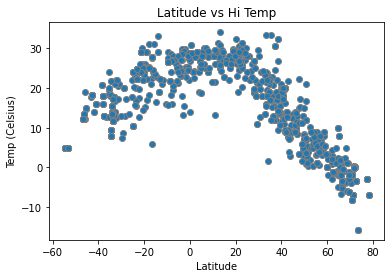

In [115]:
# Temperature (F) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Hi Temp"],edgecolors='gray')
plt.title("Latitude vs Hi Temp")
plt.xlabel("Latitude")
plt.ylabel("Temp (Celsius)")
plt.savefig("Lat_Temp.png")
plt.show()

The graph shows there is a negative correlation between the distance of a city from the Equator.  The highes temperature of the day increases as the distance from the Equator decreases.

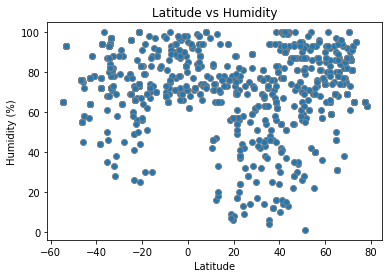

In [116]:
# Humidity (%) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors='gray')
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Lat_Humidity.png")
plt.show()

There is no observable correlation between latitude and humidity.  Humidity may have higher correlations with other variables as altitude and distance from massive water bodies.

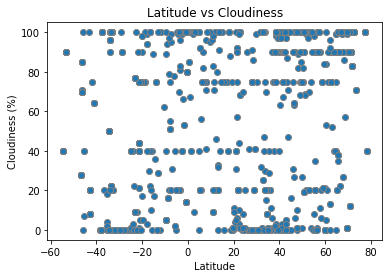

In [117]:
# Cloudiness (%) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors='gray')
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Lat_Cloudiness.png")
plt.show()

There is no apparent correlation between cloud formations and latitude.

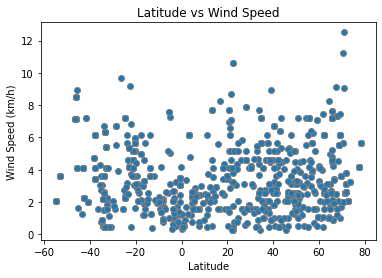

In [119]:
# Wind Speed (mph) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors='gray')
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.savefig("Lat_WindSpeed.png")
plt.show()

There is no observable correlation between wind speed and latitude.

# The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (C) vs. Latitude
* Southern Hemisphere - Temperature (C) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (km/h) vs. Latitude
* Southern Hemisphere - Wind Speed (km/h) vs. Latitude

In [122]:
# Create new Data Frames
north_df = weather_df[weather_df["Lat"] > 0]
south_df = weather_df[weather_df["Lat"] < 0]

The r-squared is: 0.8501562846455645


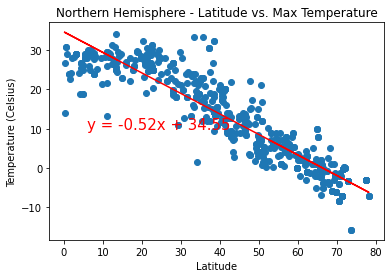

In [127]:
# Northern Hemisphere - Temperature (C) vs. Latitude

x_values = north_df['Lat']
y_values = north_df['Hi Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.title('Northern Hemisphere - Latitude vs. Max Temperature')
plt.savefig('North_Lat_Temp.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.6727590077951054


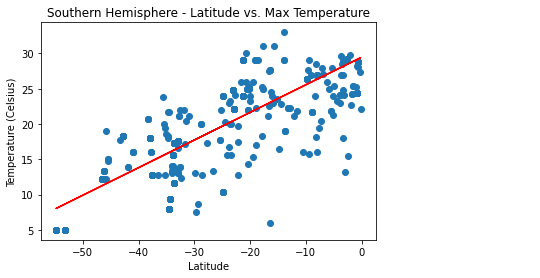

In [128]:
# Southern Hemisphere - Temperature (C) vs. Latitude

x_values = south_df['Lat']
y_values = south_df['Hi Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.title('Southern Hemisphere - Latitude vs. Max Temperature')
plt.savefig('South_Lat_Temp.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.028265959547529633


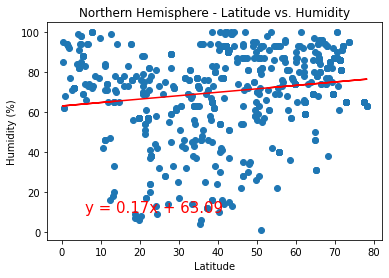

In [129]:
# Northern Hemisphere - Humidity (%) vs. Latitude

x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Northern Hemisphere - Latitude vs. Humidity')
plt.savefig('North_Lat_Humidity.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 7.175075047834292e-05


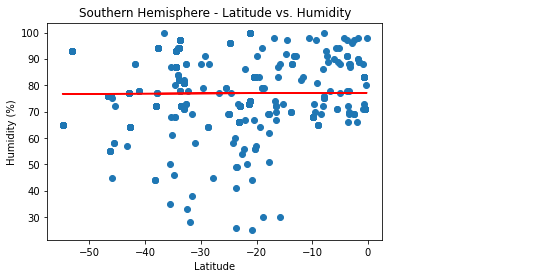

In [130]:
# Southern Hemisphere - Humidity (%) vs. Latitude

x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Southern Hemisphere - Latitude vs. Humidity')
plt.savefig('South_Lat_Humidity.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.02178496826093135


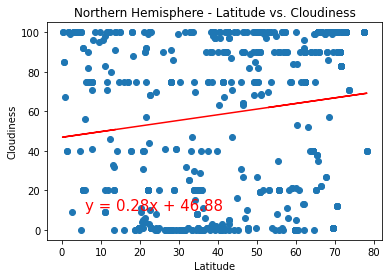

In [131]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude

x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Northern Hemisphere - Latitude vs. Cloudiness')
plt.savefig('North_Lat_Cloudiness.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00010523823664395141


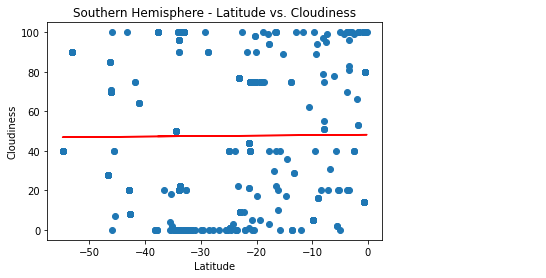

In [132]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude

x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Southern Hemisphere - Latitude vs. Cloudiness')
plt.savefig('South_Lat_Cloudiness.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.01960782801003398


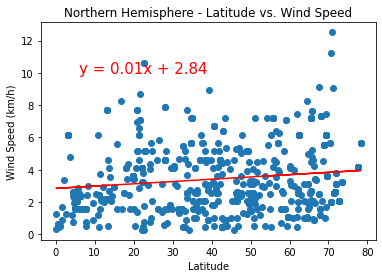

In [134]:
# Northern Hemisphere - Wind Speed (km/h) vs. Latitude

x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.title('Northern Hemisphere - Latitude vs. Wind Speed')
plt.savefig('North_Lat_WindSpeed.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.022294014771878843


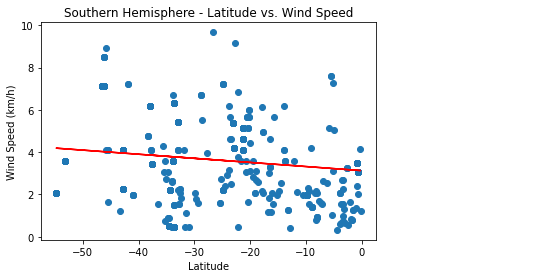

In [135]:
# Southern Hemisphere - Wind Speed (km/h) vs. Latitude

x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.title('Southern Hemisphere - Latitude vs. Wind Speed')
plt.savefig('South_Lat_WindSpeed.png')
print(f"The r-squared is: {rvalue**2}")
plt.show()